In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
#Load the dataset
data= pd.read_csv("C:\\Users\\Sai Akhil\\OneDrive\\Desktop\\conference\\heart.csv")

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
print(data.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

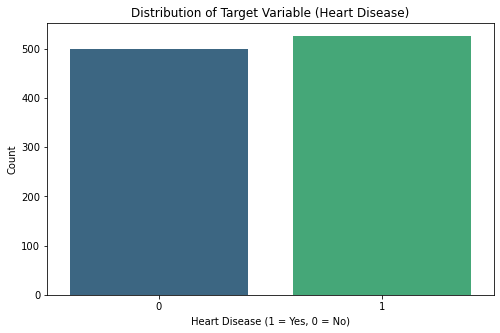

In [8]:
# Visualize the target variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=data, palette='viridis')
plt.title('Distribution of Target Variable (Heart Disease)')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

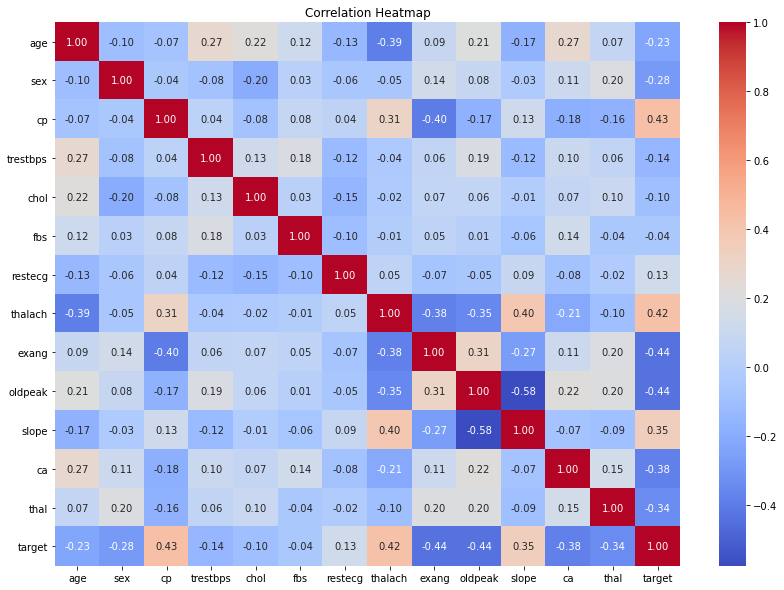

In [9]:
# Correlation heatmap to understand feature relationships
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
#Preprocess the data
# Separate features (X) and target variable (y)
X = data.drop(columns=['target'])  # Features
y = data['target']  # Target (1 = Heart Disease, 0 = No Heart Disease)

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Scale the features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
#Train the Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [14]:
# Make predictions on the test set
y_pred_train = model.predict(X_train)  # Predictions on training data
y_pred_test = model.predict(X_test)    # Predictions on test data


In [15]:
#Evaluate the model
# Calculate accuracy on training data
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f'\nTraining Accuracy: {train_accuracy * 100:.2f}%')
# Calculate accuracy on test data
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')



Training Accuracy: 87.20%
Testing Accuracy: 79.51%


In [16]:
# Print classification report for detailed metrics
print("\nClassification Report (Testing Data):")
print(classification_report(y_test, y_pred_test))



Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [17]:
# Print confusion matrix to see true positives, false positives, etc.
print("\nConfusion Matrix (Testing Data):")
cm = confusion_matrix(y_test, y_pred_test)
print(cm)


Confusion Matrix (Testing Data):
[[73 29]
 [13 90]]


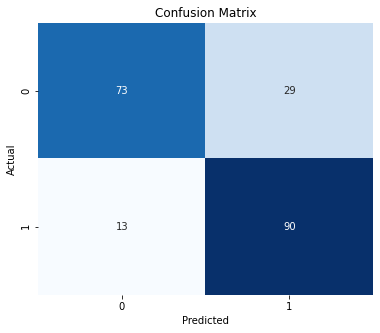

In [18]:
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
#  Predict on a new sample (Example)
# Define a new sample with appropriate feature values
# [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
new_sample = [[34, 0, 1, 118, 210, 0, 1, 192, 0, 0.7, 2, 0, 2]]  # Example features

# Scale the new sample using the same scaler used on training data
new_sample_scaled = scaler.transform(new_sample)  # Don't forget to scale new samples

# Predict using the trained model
prediction = model.predict(new_sample_scaled)

# Output the prediction result
if prediction == 1:
    print("The patient is predicted to have heart disease.")
else:
    print("The patient is predicted not to have heart disease.")


The patient is predicted to have heart disease.


In [20]:
##Explanation of the sample values:
##age: 30 (younger individuals generally have a lower risk).
##sex: 0 (female, typically a lower risk factor).
##cp: 0 (no chest pain, which decreases risk).
##trestbps: 120 (normal resting blood pressure).
##chol: 180 (lower cholesterol level).
##fbs: 0 (fasting blood sugar not elevated).
##restecg: 1 (normal results from resting electrocardiographic test).
##thalach: 170 (higher maximum heart rate during exercise).
##exang: 0 (no exercise-induced angina).
##ldpeak: 0.0 (no ST depression during exercise).
##slope: 2 (slope of the peak exercise ST segment, normal).
##ca: 0 (no major vessels colored by fluoroscopy).
##thal: 2 (normal thalassemia result).

In [27]:
new_sample = [[60,1,0,125,258,0,0,141,1,2.8,1,1,3]]  
new_sample_scaled = scaler.transform(new_sample)
prediction = model.predict(new_sample_scaled)
if prediction == 0:
    print("The patient is predicted not to have heart disease.")
else:
    print("The patient is predicted to have heart disease.")


The patient is predicted not to have heart disease.


In [36]:
# Define a function that predicts heart disease based on cholesterol thresholds
def predict_based_on_cholesterol_threshold(cholesterol_value):
    """
    This function predicts heart disease based on cholesterol levels:
    - Cholesterol < 150: No heart disease
    - Cholesterol >= 150: Heart disease
    """
    if cholesterol_value < 150:
        print(f"Cholesterol level = {cholesterol_value}: The patient is predicted not to have heart disease.")
    else:
        print(f"Cholesterol level = {cholesterol_value}: The patient is predicted to have heart disease.")

# Example: Checking predictions for different cholesterol levels
for chol_level in [100, 120, 140, 150, 160, 180, 200, 220, 250]:
    predict_based_on_cholesterol_threshold(chol_level)


Cholesterol level = 100: The patient is predicted not to have heart disease.
Cholesterol level = 120: The patient is predicted not to have heart disease.
Cholesterol level = 140: The patient is predicted not to have heart disease.
Cholesterol level = 150: The patient is predicted to have heart disease.
Cholesterol level = 160: The patient is predicted to have heart disease.
Cholesterol level = 180: The patient is predicted to have heart disease.
Cholesterol level = 200: The patient is predicted to have heart disease.
Cholesterol level = 220: The patient is predicted to have heart disease.
Cholesterol level = 250: The patient is predicted to have heart disease.


In [40]:
# Define a function that predicts heart disease based on changing cholesterol levels
def predict_with_normal_features(cholesterol_value):
    """
    This function predicts heart disease while keeping all other features at normal levels.
    The only changing feature is cholesterol.
    """
    # Set features to normal levels as per your explanation
    # [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
    new_sample = [
        [30, 0, 0, 120, cholesterol_value, 0, 1, 170, 0, 0.0, 2, 0, 2]  # Normal feature values
    ]
    
    # Scale the new sample using the same scaler
    new_sample_scaled = scaler.transform(new_sample)

    # Predict using the trained model
    prediction = model.predict(new_sample_scaled)

    # Output the prediction result
    if prediction[0] == 0:
        print(f"Cholesterol level = {cholesterol_value}: The patient is predicted not to have heart disease.")
    else:
        print(f"Cholesterol level = {cholesterol_value}: The patient is predicted to have heart disease.")

# Example: Checking predictions for different cholesterol levels
for chol_level in [40, 140, 150, 160, 180, 200, 220]:
    predict_with_normal_features(chol_level)


Cholesterol level = 40: The patient is predicted to have heart disease.
Cholesterol level = 140: The patient is predicted to have heart disease.
Cholesterol level = 150: The patient is predicted to have heart disease.
Cholesterol level = 160: The patient is predicted to have heart disease.
Cholesterol level = 180: The patient is predicted to have heart disease.
Cholesterol level = 200: The patient is predicted to have heart disease.
Cholesterol level = 220: The patient is predicted to have heart disease.


In [41]:
# Assuming model is already trained and we have X defined as features

# Checking the feature importance (coefficients) of the model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Sort by the absolute value of the coefficients
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()
sorted_coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

print(sorted_coefficients)


     Feature  Coefficient  Absolute Coefficient
2         cp     0.885843              0.885843
11        ca    -0.847620              0.847620
1        sex    -0.835705              0.835705
9    oldpeak    -0.765090              0.765090
12      thal    -0.656935              0.656935
7    thalach     0.653481              0.653481
4       chol    -0.447601              0.447601
8      exang    -0.420071              0.420071
10     slope     0.343564              0.343564
3   trestbps    -0.320016              0.320016
6    restecg     0.140566              0.140566
5        fbs    -0.062596              0.062596
0        age    -0.006055              0.006055


In [45]:
# Define a function that predicts heart disease based on changing cp values
def predict_with_fixed_features(cp_value):
    """
    This function predicts heart disease while keeping all other features at constant levels.
    The only changing feature is cp (chest pain type).
    """
    # Set features to fixed values
    # [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
    new_sample = [
        [30, 0, cp_value, 120, 180, 0, 1, 170, 0, 0.0, 2, 0, 2]  # Fixed feature values
    ]
    
    # Scale the new sample using the same scaler
    new_sample_scaled = scaler.transform(new_sample)

    # Predict using the trained model
    prediction = model.predict(new_sample_scaled)

    # Output the prediction result
    if prediction[0] == 0:
        print(f"cp value = {cp_value}: The patient is predicted not to have heart disease.")
    else:
        print(f"cp value = {cp_value}: The patient is predicted to have heart disease.")

# Example: Checking predictions for different cp values
for cp_value in [0, 1]:  # cp values range from 0 to 3
    predict_with_fixed_features(cp_value)


cp value = 0: The patient is predicted to have heart disease.
cp value = 1: The patient is predicted to have heart disease.
